Arnav Pal
BL.EN.U4AIE23145

LAB4


A1. Please evaluate confusion matrix for your classification problem. From confusion matrix, the
other performance metrics such as precision, recall and F1-Score measures for both training and test
data. Based on your observations, infer the models learning outcome (underfit / regularfit / overfit).



In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.neighbors import KNeighborsClassifier
import pickle

# Load dataset
data_path = "data.pickle"
with open(data_path, "rb") as file:
    dataset = pickle.load(file)  # dataset is a dictionary

# Convert dataset to DataFrame
df = pd.DataFrame(dataset['data'])  # Convert feature data to DataFrame
df['labels'] = dataset['labels']  # Add labels column

# Check available classes
unique_classes = df['labels'].unique()
print("Unique classes in dataset:", unique_classes)

# Convert labels to integers before filtering
df['labels'] = df['labels'].astype(int)

# Select only specified classes
selected_classes = [14, 18, 19, 21, 24, 26, 27, 32, 33, 29]
df = df[df['labels'].isin(selected_classes)]

# Ensure the dataset is not empty after filtering
if df.empty:
    raise ValueError("Filtered dataset is empty. Check if the selected classes exist in your data!")

# Proceed with feature selection
features = df.columns[:2]  # Taking first two numerical features
target = 'labels'
X = df[features]
y = df[target]

# Check dataset size
print(f"Dataset size after filtering: {len(df)} samples")
if len(df) < 5:
    raise ValueError("Too few samples after filtering! Consider using more classes or checking data.")

# Splitting data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Scaling the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# A1: Confusion Matrix and Performance Metrics
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)
y_pred_test = knn.predict(X_test)
conf_matrix = confusion_matrix(y_test, y_pred_test)
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", classification_report(y_test, y_pred_test))



Unique classes in dataset: ['10' '11' '12' '13' '14' '15' '16' '17' '18' '19' '20' '21' '22' '23'
 '24' '25' '26' '27' '28' '29' '30' '31' '32' '33' '34' '35' '4' '7' '9']
Dataset size after filtering: 1000 samples
Confusion Matrix:
 [[ 9  0  7  0  0  0  4  0  0  0]
 [ 0 20  0  0  0  0  0  0  0  0]
 [ 4  0 13  0  1  0  0  0  0  2]
 [ 0  0  0 20  0  0  0  0  0  0]
 [ 0  0  0  0 15  0  0  2  3  0]
 [ 0  0  0  0  0 20  0  0  0  0]
 [ 1  0  0  0  0  0 19  0  0  0]
 [ 0  0  0  0  0  0  0 20  0  0]
 [ 0  0  0  0  3  0  0  0 17  0]
 [ 0  0  0  0  0  0  0  0  0 20]]
Classification Report:
               precision    recall  f1-score   support

          14       0.64      0.45      0.53        20
          18       1.00      1.00      1.00        20
          19       0.65      0.65      0.65        20
          21       1.00      1.00      1.00        20
          24       0.79      0.75      0.77        20
          26       1.00      1.00      1.00        20
          27       0.83      0.9

A3. Generate 20 data points (training set data) consisting of 2 features (X & Y) whose values vary
randomly between 1 & 10. Based on the values, assign these 20 points to 2 different classes (class0 -
Blue & class1 - Red). Make a scatter plot of the training data and color the points as per their class
color. Observe the plot.



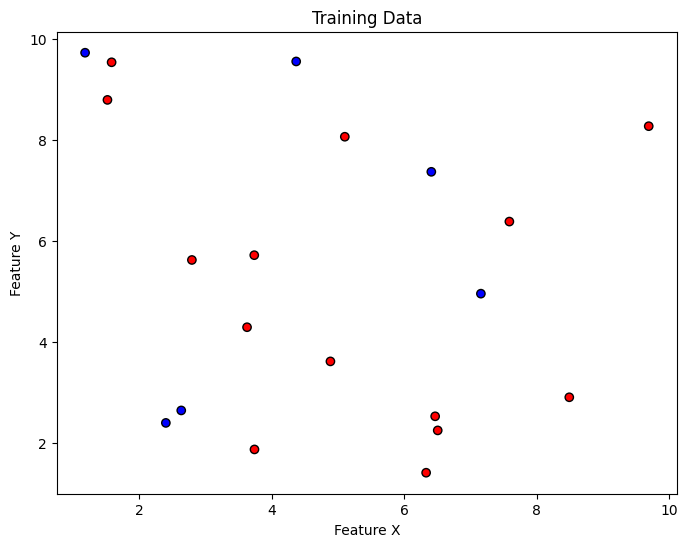

In [2]:
# A3: Generate and visualize training data for kNN
np.random.seed(42)
X_train_knn = np.random.uniform(1, 10, (20, 2))
y_train_knn = np.random.choice([0, 1], 20)

plt.figure(figsize=(8, 6))
plt.scatter(X_train_knn[:, 0], X_train_knn[:, 1], c=y_train_knn, cmap='bwr', edgecolors='k')
plt.xlabel("Feature X")
plt.ylabel("Feature Y")
plt.title("Training Data")
plt.show()



A4. Generate test set data with values of X & Y varying between 0 and 10 with increments of 0.1.
This creates a test set of about 10,000 points. Classify these points with above training data using
kNN classifier (k = 3). Make a scatter plot of the test data output with test points colored as per their
predicted class colors (all points predicted class0 are labeled blue color). Observe the color spread
and class boundary lines in the feature space.




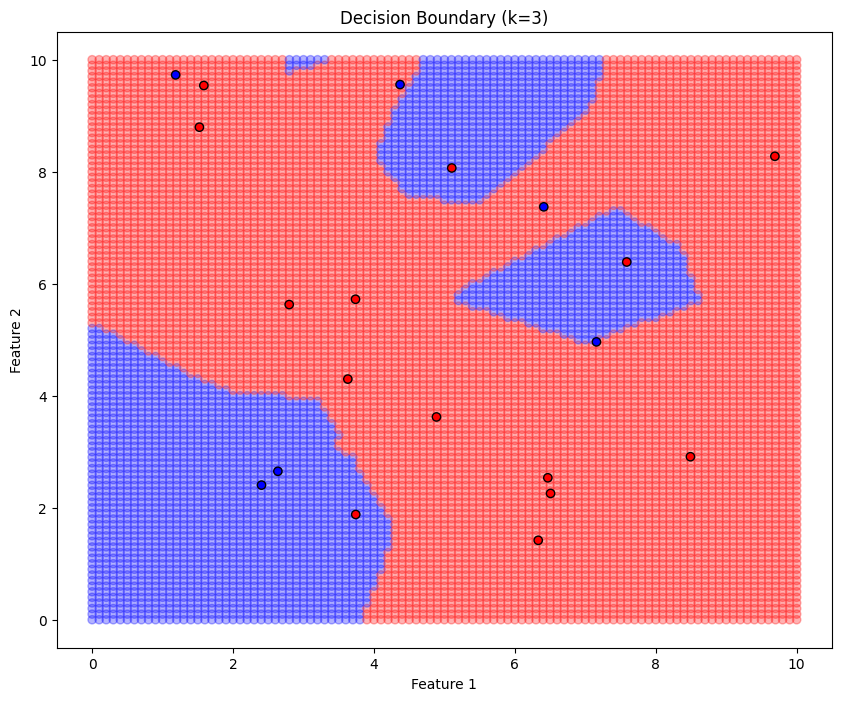

In [3]:
# A4: Generate and classify test data using kNN
x = np.arange(0, 10.1, 0.1)
y = np.arange(0, 10.1, 0.1)
xx, yy = np.meshgrid(x, y)
test_points = np.c_[xx.ravel(), yy.ravel()]

knn_random = KNeighborsClassifier(n_neighbors=3)
knn_random.fit(X_train_knn, y_train_knn)
grid_pred = knn_random.predict(test_points)

plt.figure(figsize=(10, 8))
plt.scatter(test_points[:, 0], test_points[:, 1], 
           c=grid_pred, cmap='bwr', alpha=0.3)
plt.scatter(X_train_knn[:, 0], X_train_knn[:, 1], 
           c=y_train_knn, cmap='bwr', edgecolor='black')
plt.title('Decision Boundary (k=3)')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()



A5. Repeat A4 exercise for various values of k and observe the change in the class boundary lines.


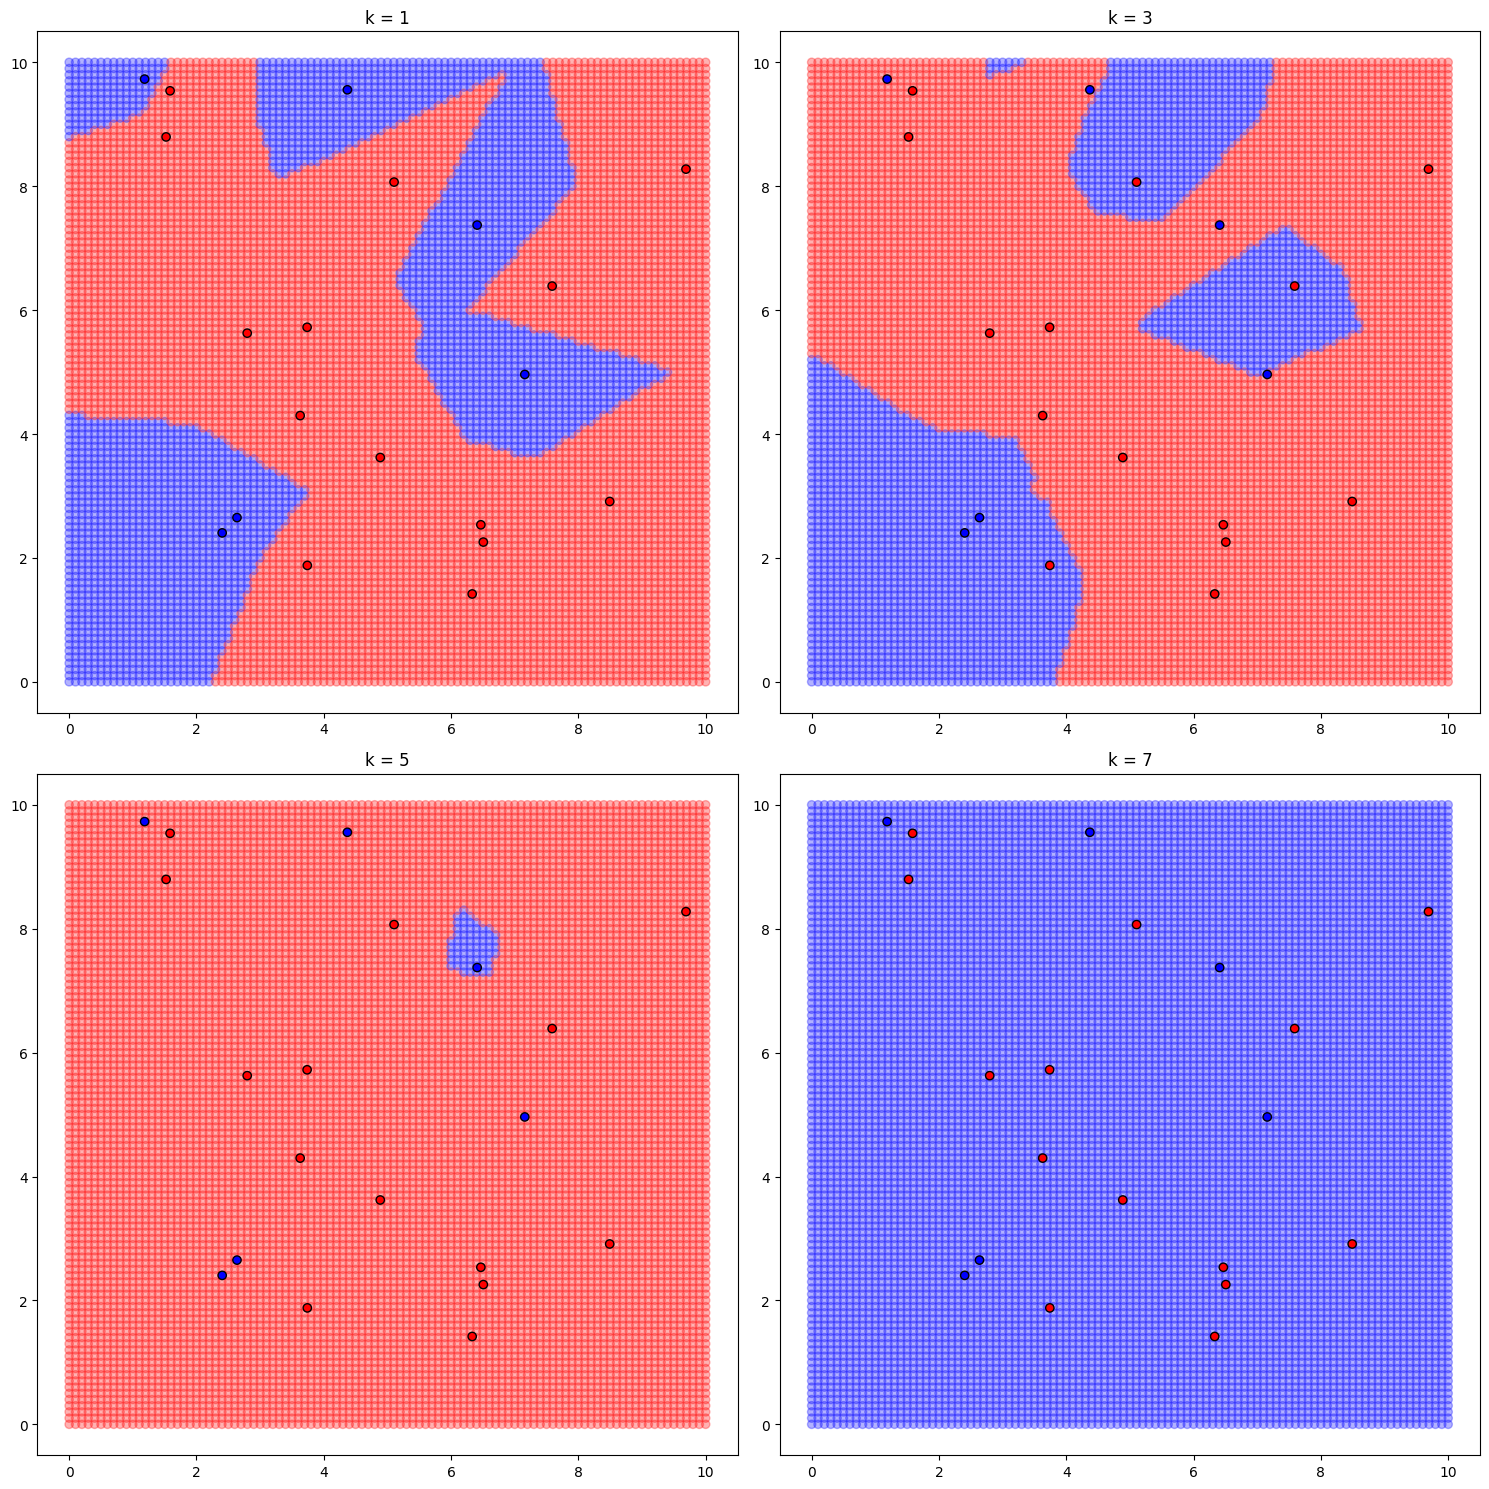

In [4]:
# A5: Repeat A4 for multiple k values
k_values = [1, 3, 5, 7]
fig, axes = plt.subplots(2, 2, figsize=(15, 15))
axes = axes.ravel()

for idx, k in enumerate(k_values):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_knn, y_train_knn)
    grid_pred = knn.predict(test_points)
    
    axes[idx].scatter(test_points[:, 0], test_points[:, 1], 
                     c=grid_pred, cmap='bwr', alpha=0.3)
    axes[idx].scatter(X_train_knn[:, 0], X_train_knn[:, 1], 
                     c=y_train_knn, cmap='bwr', edgecolor='black')
    axes[idx].set_title(f'k = {k}')
    
plt.tight_layout()
plt.show()



A6. Repeat the exercises A3 to A5 for your project data considering any two features and classes.



In [5]:
# A6: Repeat for real project data
knn_real = KNeighborsClassifier(n_neighbors=3)
knn_real.fit(X_train, y_train)
y_project_pred = knn_real.predict(X_test)
print("Project Data Classification Report:\n", classification_report(y_test, y_project_pred))



Project Data Classification Report:
               precision    recall  f1-score   support

          14       0.64      0.45      0.53        20
          18       1.00      1.00      1.00        20
          19       0.65      0.65      0.65        20
          21       1.00      1.00      1.00        20
          24       0.79      0.75      0.77        20
          26       1.00      1.00      1.00        20
          27       0.83      0.95      0.88        20
          29       0.91      1.00      0.95        20
          32       0.85      0.85      0.85        20
          33       0.91      1.00      0.95        20

    accuracy                           0.86       200
   macro avg       0.86      0.86      0.86       200
weighted avg       0.86      0.86      0.86       200



A7. Use RandomSearchCV () or GridSearchCV() operations to find the ideal 'k' value for your
kNN classifier. This is called hyper-parameter tuning.

In [6]:
# A7: Hyperparameter tuning
param_grid = {'n_neighbors': range(1, 20)}
grid_search = GridSearchCV(KNeighborsClassifier(), param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)
print("Best k value:", grid_search.best_params_['n_neighbors'])

Best k value: 1
